In [1]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Modelo 1

- Kernel Radial
- Preprocesamiento con StandardScaler
- Estimacion de Hiperparametros con RandomSearchCV
- Preprocesamiento de variables categoricas con OneHotEncoding

In [4]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='rbf', random_state=pp.RANDOM_STATE)

In [5]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [6]:
params = {'model__C': np.arange(1, 150, 25), 'model__gamma': ['scale', 'auto'] + list(np.arange(1, 20))}

cv = utils.kfold_for_cross_validation()
#rgscv = RandomizedSearchCV(
#    pipeline, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(rgscv.best_score_)
#print(rgscv.best_params_)

0.8422054875320343
{'model__gamma': 'scale', 'model__C': 1}


In [7]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='rbf', random_state=pp.RANDOM_STATE, C=1, gamma='scale', probability=True)

In [8]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [9]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.842205,0.028305,0.839056,0.878941,0.790879
accuracy,0.825223,0.029969,0.825218,0.870000,0.770000
precision,0.808021,0.051562,0.805861,0.878788,0.710526
recall,0.716768,0.039019,0.716612,0.789474,0.657895
f1 score,0.758938,0.038245,0.758621,0.816901,0.701299


### Modelo 2

- Kernel Polinomico
- Preprocesamiento con StandardScaler
- Estimación de Hiperparametros mediante RandomSearch
- Preprocesamiento de variables categoricas con OneHotEncoding

In [10]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='poly', random_state=pp.RANDOM_STATE, probability=True)

In [11]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [25]:
params = {'model__C': np.arange(1, 150, 10), 'model__degree': np.arange(1, 3)}

cv = utils.kfold_for_cross_validation()
#rgscv = RandomizedSearchCV(
#    pipeline, params, n_iter=30, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(rgscv.best_score_)
#print(rgscv.best_params_)

0.8453266493890015
{'model__degree': 2, 'model__C': 1}


In [62]:
model = SVC(kernel='poly', random_state=pp.RANDOM_STATE, C=1, degree=2, probability=True)

In [63]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [70]:
params = {'model__gamma': ['scale', 'auto'], 'model__coef0': np.arange(1, 150, 25)}

cv = utils.kfold_for_cross_validation()
#rgscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(rgscv.best_score_)
#print(rgscv.best_params_)

0.8512972254396313
{'model__coef0': 101, 'model__gamma': 'scale'}


In [71]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='poly', random_state=pp.RANDOM_STATE, C=1, degree=2, 
            gamma='scale', coef0=101, probability=True)

In [72]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [73]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.844559,0.026040,0.844321,0.875849,0.794241
accuracy,0.823960,0.036761,0.823970,0.890000,0.770000
precision,0.812537,0.065063,0.809701,0.909091,0.710526
recall,0.706899,0.035897,0.706840,0.789474,0.657895
f1 score,0.755540,0.046375,0.754783,0.845070,0.694444


### Modelo 3 

- Kernel Lineal
- Estimación de Hiperparametros con GridSearchCV
- Preprocesamiento con StandardScaler
- Preprocesamiento de variables categoricas con OneHotEncoding

In [29]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='linear', random_state=pp.RANDOM_STATE, probability=True)

In [30]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'model__C': np.arange(1, 250, 10)}

cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(gscv.best_score_)
#print(gscv.best_params_)

0.8422054875320343
{'model__C': 1}


In [44]:
params = {'model__C': np.arange(30, 60)}

cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True
#).fit(X, y)
#print(gscv.best_score_)
#print(gscv.best_params_)

0.807859749748614
{'model__C': 30}


In [55]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='linear', random_state=pp.RANDOM_STATE, C=30, probability=True)

In [56]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [57]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.829847,0.037563,0.798896,0.889449,0.770702
accuracy,0.789035,0.042141,0.789014,0.870000,0.710000
precision,0.745106,0.074626,0.739583,0.903226,0.625000
recall,0.693995,0.044979,0.693811,0.763158,0.641026
f1 score,0.717132,0.049381,0.715966,0.811594,0.632911


### Modelo 4

- Kernel Radial
- Preprocesamiento con StandardScaler
- Preprocesamiento de variables categoricas con LabelEncoding

In [58]:
preprocessor = pp.PreprocessingSE_2()
model = SVC(kernel='rbf', random_state=pp.RANDOM_STATE, C=1, gamma='scale', probability=True)

In [59]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [60]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.851941,0.033935,0.849767,0.918081,0.790879
accuracy,0.819010,0.033860,0.818976,0.890000,0.770000
precision,0.807251,0.056005,0.804511,0.909091,0.710526
recall,0.697537,0.053912,0.697068,0.789474,0.615385
f1 score,0.747035,0.045886,0.746946,0.845070,0.695652


### Métricas finales

Dado que el Modelo 1 (kernel radial) y el Modelo 2 (kernel polinomico) obtuvieron resultados similares mediante `cross_validation`, se optó por elegir el [Modelo 1](#Modelo-1).

In [74]:
preprocessor = pp.PreprocessingSE()
model = SVC(kernel='rbf', random_state=pp.RANDOM_STATE, C=1, gamma='scale', probability=True)

In [75]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.884058,0.842975,0.813953,0.760870,0.786517


Matriz de confusión:


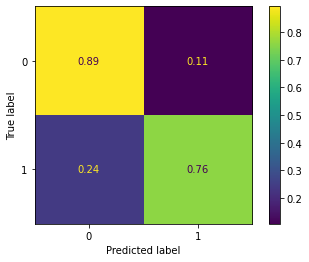

In [76]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

La métrica objetivo AUC-ROC de este modelo no supera a las obtenidas por los modelos basados en arboles. Es este caso se debe a la tasa de Falsos Positivos obtenidas por el modelo lo cual afecta a casi todas las métricas pero principalmente a Precisión, por eso es el modelo que obtiene peor resultado en ese apartado hasta el momento.

### Predicción HoldOut

In [77]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/5-SVM.csv')